## Desafio Indicium - Preços de Carros

Como é um processo de predição de valores Para a predição do valor de venda dos carros, você pode testar diferentes modelos de regressão, tais como Regressão Linear, Regressão Ridge, Regressão Lasso, Árvores de Decisão, Random Forest, Gradient Boosting, entre outros.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

#Importação da função do scikit learn para separação das bases
from sklearn.model_selection import train_test_split

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format',lambda x: '%.2f' % x)

### Importação dos dados

In [2]:
# Importação da base de dados trabalhada no EDA
df_ml_carros = pd.read_csv('./base_carros_EDA.csv')

In [3]:
#Importção da base de teste (sem a variável target)
y_teste = pd.read_csv('./cars_test.csv', encoding='utf-16', sep='\t')

In [4]:
y_teste.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.00,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.00,20258.00,Manual,4,Hatchback,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.00,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.00,53045.00,Manual,2,Picape,N,Branco,PJ,Palmas,Amazonas (AM),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.00,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.00,32486.00,Automática,4,Utilitário esportivo,N,Branco,PF,Goiânia,Goiás (GO),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.00,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.00,24937.00,Automática,4,Sedã,N,Cinza,PJ,Presidente Prudente,São Paulo (SP),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.00,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.00,62074.00,Automática,4,Sedã,N,Branco,PJ,Limeira,São Paulo (SP),Loja,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


In [5]:
#verificando valores faltantes
y_teste.isnull().sum()

id                            0
num_fotos                    60
marca                         0
modelo                        0
versao                        0
ano_de_fabricacao             0
ano_modelo                    0
hodometro                     0
cambio                        0
num_portas                    0
tipo                          0
blindado                      0
cor                           0
tipo_vendedor                 0
cidade_vendedor               0
estado_vendedor               0
anunciante                    0
entrega_delivery              0
troca                         0
elegivel_revisao              0
dono_aceita_troca          2554
veiculo_único_dono         6387
revisoes_concessionaria    6795
ipva_pago                  3298
veiculo_licenciado         4518
garantia_de_fábrica        8439
revisoes_dentro_agenda     7869
veiculo_alienado           9862
dtype: int64

Tratamento do arquivo de teste da mesma forma como fui efetuado para o de treino

In [6]:
#Retirada do campo 'veiculo_alienado', pois não possui informação.
y_teste = y_teste.drop('veiculo_alienado', axis=1)

# Mapear Colunas com respostas únicas para 1
y_teste['dono_aceita_troca'] = y_teste['dono_aceita_troca'].map({'Aceita troca': 1})
y_teste['veiculo_único_dono'] = y_teste['veiculo_único_dono'].map({'Único dono': 1})
y_teste['revisoes_concessionaria'] = y_teste['revisoes_concessionaria'].map({'Todas as revisões feitas pela concessionária': 1})
y_teste['ipva_pago'] = y_teste['ipva_pago'].map({'IPVA pago': 1})
y_teste['veiculo_licenciado'] = y_teste['veiculo_licenciado'].map({'Licenciado': 1})
y_teste['garantia_de_fábrica'] = y_teste['garantia_de_fábrica'].map({'Garantia de fábrica': 1})
y_teste['revisoes_dentro_agenda'] = y_teste['revisoes_dentro_agenda'].map({'Todas as revisões feitas pela agenda do carro': 1})


In [7]:
# Preencher valores NaN com 0
y_teste['dono_aceita_troca'].fillna(0, inplace=True)
y_teste['veiculo_único_dono'].fillna(0, inplace=True)
y_teste['revisoes_concessionaria'].fillna(0, inplace=True)
y_teste['ipva_pago'].fillna(0, inplace=True)
y_teste['veiculo_licenciado'].fillna(0, inplace=True)
y_teste['garantia_de_fábrica'].fillna(0, inplace=True)
y_teste['revisoes_dentro_agenda'].fillna(0, inplace=True)

In [8]:
#verificando valores faltantes
y_teste.isnull().sum()

id                          0
num_fotos                  60
marca                       0
modelo                      0
versao                      0
ano_de_fabricacao           0
ano_modelo                  0
hodometro                   0
cambio                      0
num_portas                  0
tipo                        0
blindado                    0
cor                         0
tipo_vendedor               0
cidade_vendedor             0
estado_vendedor             0
anunciante                  0
entrega_delivery            0
troca                       0
elegivel_revisao            0
dono_aceita_troca           0
veiculo_único_dono          0
revisoes_concessionaria     0
ipva_pago                   0
veiculo_licenciado          0
garantia_de_fábrica         0
revisoes_dentro_agenda      0
dtype: int64

In [9]:
# Retirada da coluna com o index do DF trabalhado
df_ml_carros = df_ml_carros.drop('Unnamed: 0', axis=1)

In [10]:
df_ml_carros.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,0.00,0.00,1.00,1.00,1.00,0.00,0.00,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,1.00,0.00,0.00,1.00,0.00,0.00,0.00,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,1.00,0.00,0.00,0.00,0.00,0.00,0.00,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,1.00,0.00,0.00,1.00,1.00,0.00,0.00,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,0.00,0.00,1.00,0.00,0.00,1.00,1.00,82419.76


In [11]:
# Verificar os tipos de cada coluna, pois será necessário codificar as variáveis categóricas
df_ml_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       28656 non-null  object 
 1   num_fotos                28479 non-null  float64
 2   marca                    28656 non-null  object 
 3   modelo                   28656 non-null  object 
 4   versao                   28656 non-null  object 
 5   ano_de_fabricacao        28656 non-null  int64  
 6   ano_modelo               28656 non-null  float64
 7   hodometro                28656 non-null  float64
 8   cambio                   28656 non-null  object 
 9   num_portas               28656 non-null  int64  
 10  tipo                     28656 non-null  object 
 11  blindado                 28656 non-null  object 
 12  cor                      28656 non-null  object 
 13  tipo_vendedor            28656 non-null  object 
 14  cidade_vendedor       

Verificação da quantidade de itens em cada variável categórica, para escolha de quais serão utilizadas como preditoras 
no modelo de machine learning. 
**As colunas com muitos valores serão retiradas.**

In [12]:

print(df_ml_carros['marca'].nunique())
print(df_ml_carros['modelo'].nunique())
print(df_ml_carros['versao'].nunique())
print(df_ml_carros['cambio'].nunique())
print(df_ml_carros['tipo'].nunique())
print(df_ml_carros['blindado'].nunique())
print(df_ml_carros['cor'].nunique())
print(df_ml_carros['tipo_vendedor'].nunique())
print(df_ml_carros['cidade_vendedor'].nunique())
print(df_ml_carros['estado_vendedor'].nunique())
print(df_ml_carros['anunciante'].nunique())


39
436
1801
7
7
2
6
2
550
25
4


### Separação de variáveis preditoras (ou features) e variável target

In [13]:
X_train = df_ml_carros.drop(['id','num_fotos','modelo','versao','cidade_vendedor','entrega_delivery','troca','elegivel_revisao','preco'],axis=1)
y_train = df_ml_carros[['preco']]

In [14]:
X_train.head()

,marca,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
0,NISSAN,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,São Paulo (SP),Pessoa Física,0.00,0.00,1.00,1.00,1.00,0.00,0.00
1,JEEP,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Minas Gerais (MG),Pessoa Física,1.00,0.00,0.00,1.00,0.00,0.00,0.00
2,KIA,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,São Paulo (SP),Loja,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,VOLKSWAGEN,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,São Paulo (SP),Loja,1.00,0.00,0.00,1.00,1.00,0.00,0.00
4,SSANGYONG,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro (RJ),Pessoa Física,0.00,0.00,1.00,0.00,0.00,1.00,1.00


In [15]:
X_train.columns

Index(['marca', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'cambio',
       'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'estado_vendedor', 'anunciante', 'dono_aceita_troca',
       'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
       'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda'],
      dtype='object')

In [16]:
y_train.head()

,preco
0,74732.59
1,81965.33
2,162824.81
3,123681.36
4,82419.76


### Codificação das variáveis categóricas

Conversão das variáveis categóricas para utilização do algoritmo. Utilização do OneHotEncoder, que é uma forma simples de transformação de categorias não ordinais em números.

In [17]:
# Busca das colunas não numéricas
colunas_categoricas = X_train.select_dtypes(include=[object]).columns
colunas_categoricas

Index(['marca', 'cambio', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'estado_vendedor', 'anunciante'],
      dtype='object')

In [18]:
# Utilização do OHE (One Hot Encoder) para variáveis categóricas nominais
from sklearn.preprocessing import OneHotEncoder

# Criar uma instância do OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

In [19]:
# Aplicar o One Hot Encoder nas colunas categóricas
encoded_features = encoder.fit_transform(X_train[colunas_categoricas])

# Obter os nomes das novas colunas após a codificação
encoded_columns = encoder.get_feature_names_out(colunas_categoricas)

# Salvar o OneHotEncoder usando o joblib
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [20]:
# Criar um novo dataframe com as features codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Concatenar o dataframe codificado com as demais features
X_train_encoded = pd.concat([X_train.drop(colunas_categoricas, axis=1), encoded_df], axis=1)

In [21]:
X_train_encoded.head()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_EFFA,marca_FERRARI,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Vermelho,tipo_vendedor_PJ,estado_vendedor_Alagoas (AL),estado_vendedor_Amazonas (AM),estado_vendedor_Bahia (BA),estado_vendedor_Ceará (CE),estado_vendedor_Espírito Santo (ES),estado_vendedor_Goiás (GO),estado_vendedor_Maranhão (MA),estado_vendedor_Mato Grosso (MT),estado_vendedor_Mato Grosso do Sul (MS),estado_vendedor_Minas Gerais (MG),estado_vendedor_Paraná (PR),estado_vendedor_Paraíba (PB),estado_vendedor_Pará (PA),estado_vendedor_Pernambuco (PE),estado_vendedor_Piauí (PI),estado_vendedor_Rio Grande do Norte (RN),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Rio de Janeiro (RJ),estado_vendedor_Rondônia (RO),estado_vendedor_Roraima (RR),estado_vendedor_Santa Catarina (SC),estado_vendedor_Sergipe (SE),estado_vendedor_São Paulo (SP),estado_vendedor_Tocantins (TO),anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física
0,2017,2017.00,67772.00,4,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,2017,2017.00,62979.00,4,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,2018,2019.00,44070.00,4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,2013,2015.00,85357.00,4,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,2013,2015.00,71491.00,4,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.

In [22]:
X_train_encoded.shape

(28656, 95)

### Feature Scaling
Utilização do StandardScaler para executar o scaling das features com objetivo de mantê-las em uma mesma escala de grandeza.

In [23]:
from sklearn.preprocessing import StandardScaler

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Aplicar o scaling nas features numéricas
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Converter o array resultante em um novo dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)

# Salvar o StandardScaler usando o joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
X_train_scaled.head()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_EFFA,marca_FERRARI,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Vermelho,tipo_vendedor_PJ,estado_vendedor_Alagoas (AL),estado_vendedor_Amazonas (AM),estado_vendedor_Bahia (BA),estado_vendedor_Ceará (CE),estado_vendedor_Espírito Santo (ES),estado_vendedor_Goiás (GO),estado_vendedor_Maranhão (MA),estado_vendedor_Mato Grosso (MT),estado_vendedor_Mato Grosso do Sul (MS),estado_vendedor_Minas Gerais (MG),estado_vendedor_Paraná (PR),estado_vendedor_Paraíba (PB),estado_vendedor_Pará (PA),estado_vendedor_Pernambuco (PE),estado_vendedor_Piauí (PI),estado_vendedor_Rio Grande do Norte (RN),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Rio de Janeiro (RJ),estado_vendedor_Rondônia (RO),estado_vendedor_Roraima (RR),estado_vendedor_Santa Catarina (SC),estado_vendedor_Sergipe (SE),estado_vendedor_São Paulo (SP),estado_vendedor_Tocantins (TO),anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física
0,-0.05,-0.36,0.34,0.17,-1.67,-0.75,1.49,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,8.06,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,-1.79,-0.03,3.87,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,0.89,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,0.90,-0.03,-0.25,-0.71,0.81
1,-0.05,-0.36,0.19,0.17,0.60,-0.75,-0.67,0.71,-1.08,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,3.66,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,0.89,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,3.95,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,-1.11,-0.03,-0.25,-0.71,0.81
2,0.28,0.41,-0.43,0.17,0.60,-0.75,-0.67,-1.41,-1.08,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,8.37,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,0.89,-0.35,-0.08,-0.24,-0.01,-0.24,2.25,-0.01,1.23,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,0.90,-0.03,-0.25,1.40,-1.23
3,-1.38,-1.14,0.92,0.17,0.60,-0.75,-0.67,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,2.31,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,2.28,-1.12,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,1.23,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-

## Machine Learning - Regressão

Testaremos diversos modelos de regressão para verificar qual se adapta melhor à base de dados disponível. 

Para avaliação de performance utilizaremos o RSME (Raiz do erro quadrático médio) pois ela penaliza predições muito distantes da real, e no caso de preços de carros, não queremos um descolamento grande.

Será utilizado validação cruzada de 10 folds, para obtenção de um RSME médio.

### 1. Regressão Linear

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Instanciar o modelo
linear_model = LinearRegression()

# Treinar o modelo
linear_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = linear_model.predict(X_train_scaled)

# Realizar a validação cruzada com 10 folds
scores = cross_val_score(linear_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Regressão Linear:")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

Regressão Linear:
RMSE Médio (Validação Cruzada): 47117.790597295236


### 2. Regressão Ridge

In [26]:
from sklearn.linear_model import Ridge

# Instanciar o modelo
ridge_model = Ridge()

# Treinar o modelo
ridge_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = ridge_model.predict(X_train_scaled)

# Realizar a validação cruzada com 10 folds
scores = cross_val_score(ridge_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Regressão Ridge:")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

Regressão Ridge:
RMSE Médio (Validação Cruzada): 47072.21280290898


### 3. Árvores de Decisão

In [27]:
from sklearn.tree import DecisionTreeRegressor


# Instanciar o modelo
tree_model = DecisionTreeRegressor()

# Treinar o modelo
tree_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = tree_model.predict(X_train_scaled)

# Realizar a validação cruzada com 10 folds
scores = cross_val_score(tree_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Árvores de Decisão:")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

Árvores de Decisão:
RMSE Médio (Validação Cruzada): 56577.873898082245


### 4. Random Forest

In [28]:
'''
from sklearn.ensemble import RandomForestRegressor

# Instanciar o modelo
forest_model = RandomForestRegressor()

# Treinar o modelo
forest_model.fit(X_train_scaled, np.ravel(y_train,order='C'))

# Fazer previsões
y_pred = forest_model.predict(X_train_scaled)

# Realizar a validação cruzada com 10 folds
scores = cross_val_score(forest_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Árvores de Decisão:")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

'''

'\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Instanciar o modelo\nforest_model = RandomForestRegressor()\n\n# Treinar o modelo\nforest_model.fit(X_train_scaled, np.ravel(y_train,order=\'C\'))\n\n# Fazer previsões\ny_pred = forest_model.predict(X_train_scaled)\n\n# Realizar a validação cruzada com 10 folds\nscores = cross_val_score(forest_model, X_train_scaled, y_train, scoring=\'neg_mean_squared_error\', cv=10)\n\n# Calcular o RMSE médio\nrmse_medio = np.sqrt(-scores.mean())\nprint("Árvores de Decisão:")\nprint("RMSE Médio (Validação Cruzada):", rmse_medio)\n\n'

### 5. Gradient Boosting (XGBoost)

In [29]:
import xgboost as xgb

# Instanciar o modelo
boosting_model = xgb.XGBRegressor()

# Treinar o modelo
boosting_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = boosting_model.predict(X_train_scaled)

# Realizar a validação cruzada com 10 folds
scores = cross_val_score(boosting_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Gradient Boosting (XGBoost)")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

Gradient Boosting (XGBoost)
RMSE Médio (Validação Cruzada): 40886.95957063306


In [30]:
from sklearn.metrics import r2_score
print("R² Score:",r2_score(y_train, y_pred))

R² Score: 0.7669189632175605


#### XGBOOST foi o modelo com a melhor performance

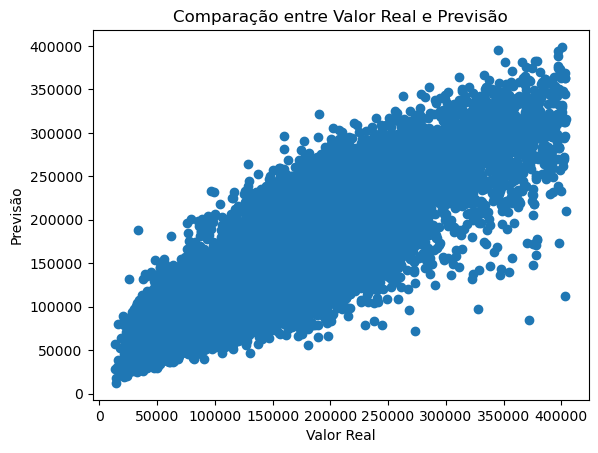

RMSE médio durante a validação cruzada: 40886.95957063306


In [31]:
#plt.scatter(y_train['preco'].values.ravel(), y_pred)

# Plotar gráfico de dispersão
plt.scatter(y_train, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Comparação entre Valor Real e Previsão')
plt.show()

print(f"RMSE médio durante a validação cruzada: {rmse_medio}")

#### Vamos testar alguns hiperparâmetros do XGBoost para tentar uma melhora de performance

In [32]:
'''
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir os parâmetros a serem testados
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Criar o modelo
xgb_model = XGBRegressor()

# Realizar a busca em grade
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train['preco'].values.ravel())

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Melhor valor de R2 score encontrado
best_score = grid_search.best_score_
print("Melhor valor de R2 score encontrado:", best_score)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom xgboost import XGBRegressor\n\n# Definir os parâmetros a serem testados\nparameters = {\n    \'max_depth\': [3, 5, 7],\n    \'learning_rate\': [0.1, 0.01, 0.001],\n    \'n_estimators\': [100, 500, 1000],\n}\n\n# Criar o modelo\nxgb_model = XGBRegressor()\n\n# Realizar a busca em grade\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring=\'r2\', cv=5)\ngrid_search.fit(X_train_scaled, y_train[\'preco\'].values.ravel())\n\n# Melhores hiperparâmetros encontrados\nbest_params = grid_search.best_params_\nprint("Melhores hiperparâmetros encontrados:", best_params)\n\n# Melhor valor de R2 score encontrado\nbest_score = grid_search.best_score_\nprint("Melhor valor de R2 score encontrado:", best_score)\n'

#### Alterando o XGBoost para os parâmetros encontrados

In [33]:
# Definir os melhores hiperparâmetros encontrados
learning_rate = 0.1
max_depth = 5
n_estimators = 500

# Criar o modelo XGBoost com os hiperparâmetros otimizados
xgb_model = xgb.XGBRegressor(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

# Treinar o modelo
xgb_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_xgb = xgb_model.predict(X_train_scaled)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_train, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# Imprimir as métricas de avaliação
print("RMSE:", rmse)
print("R2 Score:", r2)


# Realizar a validação cruzada com 10 folds
scores = cross_val_score(xgb_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

# Calcular o RMSE médio
rmse_medio = np.sqrt(-scores.mean())
print("Gradient Boosting (XGBoost) tuned")
print("RMSE Médio (Validação Cruzada):", rmse_medio)

RMSE: 35189.47884285755
R2 Score: 0.7669189632175605
Gradient Boosting (XGBoost) tuned
RMSE Médio (Validação Cruzada): 40466.7100091071


### Preparando o arquivo de teste para realizar a predição de valores

In [34]:
y_teste.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
0,13518783164498355150900635905895481162,8.00,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.00,20258.00,Manual,4,Hatchback,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,1.00,0.00,0.00,1.00,1.00,1.00,0.00
1,299896161723793383246777788797566040330,18.00,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.00,53045.00,Manual,2,Picape,N,Branco,PJ,Palmas,Amazonas (AM),Loja,False,False,False,1.00,1.00,0.00,1.00,1.00,0.00,0.00
2,316180649972302128246133616457018378621,8.00,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.00,32486.00,Automática,4,Utilitário esportivo,N,Branco,PF,Goiânia,Goiás (GO),Pessoa Física,False,False,False,1.00,0.00,0.00,1.00,0.00,0.00,0.00
3,222527157104148385909188217274642813298,16.00,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.00,24937.00,Automática,4,Sedã,N,Cinza,PJ,Presidente Prudente,São Paulo (SP),Loja,False,False,False,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,160460343059850745858546502614838368036,8.00,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.00,62074.00,Automática,4,Sedã,N,Branco,PJ,Limeira,São Paulo (SP),Loja,False,False,False,1.00,0.00,0.00,1.00,1.00,0.00,0.00


In [35]:
#Igualar as informações ao arquivo X_treino para não dar divergencia nas features após o One Hot Encoder

# Listar linhas onde 'cor' é igual a 'dourado'
linhas_azul = y_teste[y_teste['cor'] == 'Azul'].index
# Alterar uma das linhas para 'vermelho'
y_teste.loc[linhas_azul[0], 'cor'] = 'Vermelho'

# Listar linhas onde 'estado' é igual a 'PI'
linhas_pi = y_teste[y_teste['estado_vendedor'] == 'Piauí (PI)'].index
# Alterar uma das linhas para 'Maranhão (MA)'
y_teste.loc[linhas_pi[0], 'estado_vendedor'] = 'Maranhão (MA)'

# Localizar a linha com 'Conversível' em tipo e trocar para 'Minivan'
y_teste.loc[y_teste['tipo'] == 'Conversível', 'tipo'] = 'Minivan'

# Localizar o valor 'LAMBORGHINI' em marca e trocar por 'FERRARI'
y_teste.loc[y_teste['marca'] == 'LAMBORGHINI', 'marca'] = 'FERRARI'

# Listar linhas onde 'marca' é igual a 'JAC'
linhas_conversivel = y_teste[y_teste['marca'] == 'JAC'].index
# Alterar uma das linhas para 'IVECO'
y_teste.loc[linhas_pi[0], 'marca'] = 'IVECO'


In [36]:
y_teste_work = y_teste.drop(['id','num_fotos','modelo','versao','cidade_vendedor','entrega_delivery','troca','elegivel_revisao'],axis=1)

In [37]:
y_teste_work.head()

,marca,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
0,NISSAN,2021,2021.00,20258.00,Manual,4,Hatchback,N,Branco,PF,São Paulo (SP),Pessoa Física,1.00,0.00,0.00,1.00,1.00,1.00,0.00
1,FIAT,2021,2021.00,53045.00,Manual,2,Picape,N,Branco,PJ,Amazonas (AM),Loja,1.00,1.00,0.00,1.00,1.00,0.00,0.00
2,AUDI,2018,2019.00,32486.00,Automática,4,Utilitário esportivo,N,Branco,PF,Goiás (GO),Pessoa Física,1.00,0.00,0.00,1.00,0.00,0.00,0.00
3,CHEVROLET,2019,2020.00,24937.00,Automática,4,Sedã,N,Cinza,PJ,São Paulo (SP),Loja,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,FORD,2019,2019.00,62074.00,Automática,4,Sedã,N,Branco,PJ,São Paulo (SP),Loja,1.00,0.00,0.00,1.00,1.00,0.00,0.00


In [38]:
# Aplicar o One Hot Encoder nas colunas categóricas
encoded_features_y = encoder.transform(y_teste_work[colunas_categoricas])

# Obter os nomes das novas colunas após a codificação
encoded_columns_y = encoder.get_feature_names_out(colunas_categoricas)

In [39]:
# Criar um novo dataframe com as features codificadas
encoded_df_y = pd.DataFrame(encoded_features_y, columns=encoded_columns_y)

# Concatenar o dataframe codificado com as demais features
y_teste_encoded = pd.concat([y_teste_work.drop(colunas_categoricas, axis=1), encoded_df_y], axis=1)

In [40]:
# Aplicar a transformação nos dados de teste
y_teste_scaled = scaler.transform(y_teste_encoded)

# Converter o array resultante em um novo dataframe
y_teste_scaled = pd.DataFrame(y_teste_scaled, columns=y_teste_encoded.columns)

In [41]:
y_teste_scaled.head()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_EFFA,marca_FERRARI,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Vermelho,tipo_vendedor_PJ,estado_vendedor_Alagoas (AL),estado_vendedor_Amazonas (AM),estado_vendedor_Bahia (BA),estado_vendedor_Ceará (CE),estado_vendedor_Espírito Santo (ES),estado_vendedor_Goiás (GO),estado_vendedor_Maranhão (MA),estado_vendedor_Mato Grosso (MT),estado_vendedor_Mato Grosso do Sul (MS),estado_vendedor_Minas Gerais (MG),estado_vendedor_Paraná (PR),estado_vendedor_Paraíba (PB),estado_vendedor_Pará (PA),estado_vendedor_Pernambuco (PE),estado_vendedor_Piauí (PI),estado_vendedor_Rio Grande do Norte (RN),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Rio de Janeiro (RJ),estado_vendedor_Rondônia (RO),estado_vendedor_Roraima (RR),estado_vendedor_Santa Catarina (SC),estado_vendedor_Sergipe (SE),estado_vendedor_São Paulo (SP),estado_vendedor_Tocantins (TO),anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física
0,1.28,1.19,-1.21,0.17,0.60,-0.75,-0.67,0.71,0.92,2.38,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,8.06,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,-1.79,-0.03,-0.26,2.24,-0.04,2.23,-0.02,-0.02,-0.44,-1.12,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,0.90,-0.03,-0.25,-0.71,0.81
1,1.28,1.19,-0.14,-5.97,0.60,1.33,-0.67,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,3.76,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,-1.79,-0.03,-0.26,2.24,-0.04,-0.45,-0.02,-0.02,2.28,-1.12,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,1.23,-0.07,23.68,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,-1.11,-0.03,-0.25,1.40,-1.23
2,0.28,0.41,-0.81,0.17,0.60,-0.75,-0.67,0.71,-1.08,-0.42,-0.50,4.02,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,-1.12,2.82,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,5.99,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,-1.11,-0.03,-0.25,-0.71,0.81
3,0.61,0.80,-1.05,0.17,0.60,1.33,-0.67,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,2.95,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,0.89,-0.35,-0.08,4.11,-0.01,-0.24,-0.45,-0.01,1.23,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-

In [42]:
y_teste_scaled.shape

(9862, 95)

In [43]:
X_train_scaled.shape

(28656, 95)

## Previsão dos preços dos carros do arquivo de Teste

In [44]:
# Reordenar as colunas
colunas_ordem = X_train_scaled.columns
X_train_scaled = X_train_scaled[colunas_ordem]
y_teste_scaled = y_teste_scaled[colunas_ordem]

In [45]:
#Predição dos preços dos carros para o arquivo de teste
y_teste_scaled.head()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_EFFA,marca_FERRARI,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Vermelho,tipo_vendedor_PJ,estado_vendedor_Alagoas (AL),estado_vendedor_Amazonas (AM),estado_vendedor_Bahia (BA),estado_vendedor_Ceará (CE),estado_vendedor_Espírito Santo (ES),estado_vendedor_Goiás (GO),estado_vendedor_Maranhão (MA),estado_vendedor_Mato Grosso (MT),estado_vendedor_Mato Grosso do Sul (MS),estado_vendedor_Minas Gerais (MG),estado_vendedor_Paraná (PR),estado_vendedor_Paraíba (PB),estado_vendedor_Pará (PA),estado_vendedor_Pernambuco (PE),estado_vendedor_Piauí (PI),estado_vendedor_Rio Grande do Norte (RN),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Rio de Janeiro (RJ),estado_vendedor_Rondônia (RO),estado_vendedor_Roraima (RR),estado_vendedor_Santa Catarina (SC),estado_vendedor_Sergipe (SE),estado_vendedor_São Paulo (SP),estado_vendedor_Tocantins (TO),anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física
0,1.28,1.19,-1.21,0.17,0.60,-0.75,-0.67,0.71,0.92,2.38,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,8.06,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,-1.79,-0.03,-0.26,2.24,-0.04,2.23,-0.02,-0.02,-0.44,-1.12,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,0.90,-0.03,-0.25,-0.71,0.81
1,1.28,1.19,-0.14,-5.97,0.60,1.33,-0.67,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,3.76,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,-1.79,-0.03,-0.26,2.24,-0.04,-0.45,-0.02,-0.02,2.28,-1.12,-0.35,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,1.23,-0.07,23.68,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,-1.11,-0.03,-0.25,1.40,-1.23
2,0.28,0.41,-0.81,0.17,0.60,-0.75,-0.67,0.71,-1.08,-0.42,-0.50,4.02,-0.25,-0.07,-0.34,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,-1.12,2.82,-0.08,-0.24,-0.01,-0.24,-0.45,-0.01,-0.82,-0.07,-0.04,-0.15,-0.05,-0.03,5.99,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-0.29,-0.03,-1.11,-0.03,-0.25,-0.71,0.81
3,0.61,0.80,-1.05,0.17,0.60,1.33,-0.67,0.71,0.92,-0.42,-0.50,-0.25,-0.25,-0.07,2.95,-0.03,-0.08,-0.03,-0.01,-0.01,-0.27,-0.19,-0.24,-0.27,-0.01,-0.01,-0.07,-0.27,-0.12,-0.16,-0.05,-0.02,-0.01,-0.20,-0.07,-0.17,-0.12,-0.25,-0.10,-0.07,-0.14,-0.02,-0.02,-0.03,-0.04,-0.28,-0.07,-0.43,-0.10,-0.04,0.56,-0.03,-0.26,-0.45,-0.04,-0.45,-0.02,-0.02,-0.44,0.89,-0.35,-0.08,4.11,-0.01,-0.24,-0.45,-0.01,1.23,-0.07,-0.04,-0.15,-0.05,-0.03,-0.17,-0.02,-0.03,-0.03,-0.25,-0.31,-0.06,-0.05,-0.11,-0.01,-0.06,-0.24,-0.31,-0.01,-0.01,-

In [46]:
y_pred_teste = xgb_model.predict(y_teste_scaled)

In [47]:
y_pred_teste

array([ 67644.59,  72529.62, 241577.4 , ...,  96823.11, 125319.86,
       271594.53], dtype=float32)

#### Exportação do resultado para arquivo csv contendo 2 colunas, ID e Preco

In [48]:
# Criar dataframe com as colunas 'id' e 'preco'
df_resultado = pd.DataFrame({'id': y_teste['id'], 'preco': y_pred_teste})

# Salvar o dataframe em um arquivo CSV
df_resultado.to_csv('predicted.csv', index=False)

#### Após a validação e teste do modelo, preparar para a aplicação

In [49]:
with open('./xgb_model.pkl', 'wb') as arquivo_modelo:
    joblib.dump(xgb_model, arquivo_modelo,compress=3)

In [50]:
# exportar base de dados com parquet para utilizar na aplicação
df_ml_carros.to_parquet('./data/carros.parquet')